import necessary libraries and functions 

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

load dataset to be used 

In [2]:
digits = tf.keras.datasets.mnist.load_data(path="mnist.npz")


divide training data and testing data

In [3]:
(train_images,y_train),(test_images,y_test) = digits

example of what data looks like translated from numpy array to plot

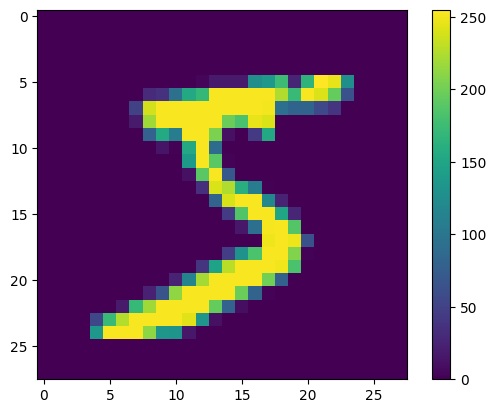

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

shape of training set

In [5]:
train_images.shape

(60000, 28, 28)

shape of test set

In [6]:
test_images.shape

(10000, 28, 28)

model creation

In [97]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(256,activation = 'relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation = "softmax")
])

model compile

In [98]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

model fit

In [103]:
model.fit(train_images,y_train, 
epochs = 50,
batch_size= 50,
validation_data = (test_images,y_test),
)

Epoch 1/50
1200/1200 [==============================] - 14s 11ms/step - loss: 0.0640 - accuracy: 0.9807 - val_loss: 0.1105 - val_accuracy: 0.9761
Epoch 2/50
1200/1200 [==============================] - 14s 12ms/step - loss: 0.0537 - accuracy: 0.9832 - val_loss: 0.1046 - val_accuracy: 0.9757
Epoch 3/50
1200/1200 [==============================] - 14s 12ms/step - loss: 0.0437 - accuracy: 0.9865 - val_loss: 0.1008 - val_accuracy: 0.9745
Epoch 4/50
1200/1200 [==============================] - 14s 12ms/step - loss: 0.0369 - accuracy: 0.9880 - val_loss: 0.0957 - val_accuracy: 0.9763
Epoch 5/50
1200/1200 [==============================] - 14s 12ms/step - loss: 0.0308 - accuracy: 0.9900 - val_loss: 0.0879 - val_accuracy: 0.9787
Epoch 6/50
1200/1200 [==============================] - 14s 12ms/step - loss: 0.0273 - accuracy: 0.9911 - val_loss: 0.1123 - val_accuracy: 0.9762
Epoch 7/50
1200/1200 [==============================] - 14s 12ms/step - loss: 0.0264 - accuracy: 0.9916 - val_loss: 0.0862 -

model evaluation

In [106]:
test_loss, test_acc = model.evaluate(test_images,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1033 - accuracy: 0.9807


test image predictions

In [107]:
predict = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


sample prediction data

In [108]:
predict[0]

np.argmax(predict[0])
np.argmax(predict[1])


2

In [109]:
class_names = [0,1,2,3,4,5,6,7,8,9]

function to graph predicted data as an image

In [110]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap = plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label], color=color))

sample plot

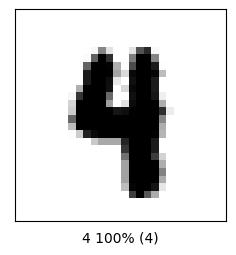

In [111]:
plt.figure(figsize =(6,3))
plt.subplot(1,2,1)
plot_image(250,predict,y_test,test_images)

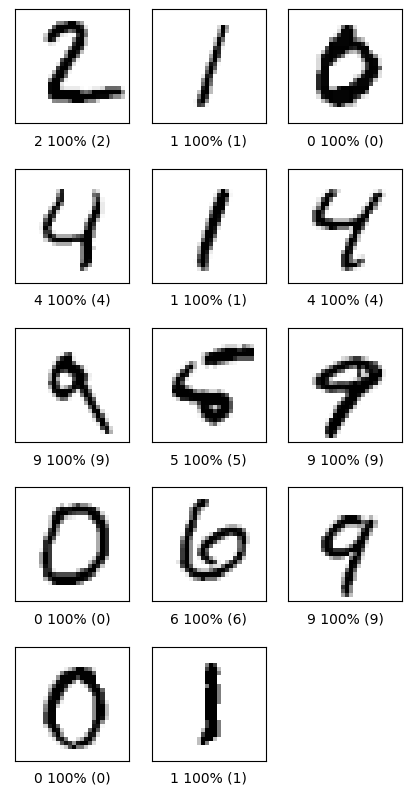

In [112]:
plt.figure(figsize = (5,10))
for i in range(1,15):
    plt.subplot(5,3,i)
    plot_image(i,predict,y_test,test_images)

plt.show()

In [113]:
img = test_images
predict_single = model.predict(img)




313/313 [==============================] - 1s 3ms/step


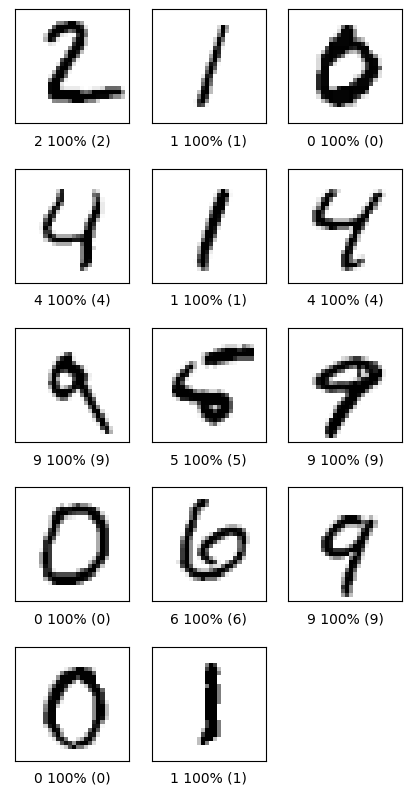

In [114]:
plt.figure(figsize = (5,10))
for i in range(1,15):
    plt.subplot(5,3,i)
    plot_image(i,predict_single,y_test,test_images)

plt.show()

using an image outside and testing if the algorithm recognizes new data

(28, 28)
1/1 [==============================] - 0s 40ms/step


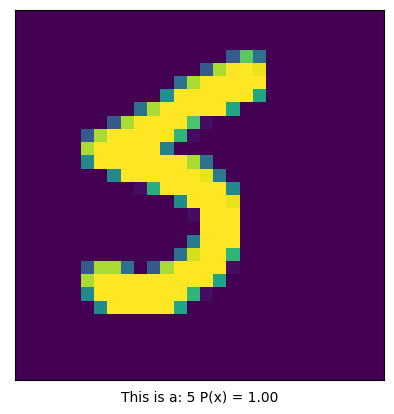

In [172]:
import matplotlib.image as mpimg
from PIL import Image
imgr = Image.open('digitsexample2.png')
imgr = imgr.resize((28,28),Image.ANTIALIAS)
imgr = np.array(imgr).T
imgr = np.reshape(imgr[0],(28,28))
print(imgr.shape)

imgr = imgr.T
imgr = [[255 - x for x in l] for l in imgr]
img = np.expand_dims(imgr,0)
predict_single = model.predict(img)
plt.imshow(imgr)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.xlabel("This is a: %d P(x) = %.2f"%(np.argmax(predict_single[0]),predict_single[0][np.argmax(predict_single[0])]))
plt.show()

In [140]:
model.save('./MyDigitsModel',save_format ='tf')

INFO:tensorflow:Assets written to: ./MyDigitsModel\assets
